In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import rough_wrangle as w

# Acquire

In [2]:
# call the function to acquire the data from wrangle file for test data
test_outpatient_df,test_inpatient_df, test_beneficiary_df, test_df = w.acquire_test_data()


In [3]:
# call the function to acquire the data from wrangle file for train data
train_outpatient_df, train_inpatient_df, train_beneficiary_df, train_df = w.acquire_train_data()


In [4]:
train_beneficiary_df.head()

,BeneID,DOB,DOD,Gender,Race,RenalDiseaseIndicator,State,County,NoOfMonths_PartACov,NoOfMonths_PartBCov,...,ChronicCond_Depression,ChronicCond_Diabetes,ChronicCond_IschemicHeart,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt
0,BENE11001,1943-01-01,NaN,1,1,0,39,230,12,12,...,1,1,1,2,1,1,36000,3204,60,70
1,BENE11002,1936-09-01,NaN,2,1,0,39,280,12,12,...,2,2,2,2,2,2,0,0,30,50
2,BENE11003,1936-08-01,NaN,1,1,0,52,590,12,12,...,2,2,1,2,2,2,0,0,90,40
3,BENE11004,1922-07-01,NaN,1,1,0,39,270,12,12,...,2,1,1,1,1,2,0,0,1810,760
4,BENE11005,1935-09-01,NaN,1,1,0,24,680,12,12,...,2,1,2,2,2,2,0,0,1790,1200


In [5]:
train_inpatient_df.head()

,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,AdmissionDt,...,ClmDiagnosisCode_7,ClmDiagnosisCode_8,ClmDiagnosisCode_9,ClmDiagnosisCode_10,ClmProcedureCode_1,ClmProcedureCode_2,ClmProcedureCode_3,ClmProcedureCode_4,ClmProcedureCode_5,ClmProcedureCode_6
0,BENE11001,CLM46614,2009-04-12,2009-04-18,PRV55912,26000,PHY390922,NaN,NaN,2009-04-12,...,2724,19889,5849,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,BENE11001,CLM66048,2009-08-31,2009-09-02,PRV55907,5000,PHY318495,PHY318495,NaN,2009-08-31,...,NaN,NaN,NaN,NaN,7092.0,NaN,NaN,NaN,NaN,NaN
2,BENE11001,CLM68358,2009-09-17,2009-09-20,PRV56046,5000,PHY372395,NaN,PHY324689,2009-09-17,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,BENE11011,CLM38412,2009-02-14,2009-02-22,PRV52405,5000,PHY369659,PHY392961,PHY349768,2009-02-14,...,25062,40390,4019,NaN,331.0,NaN,NaN,NaN,NaN,NaN
4,BENE11014,CLM63689,2009-08-13,2009-08-30,PRV56614,10000,PHY379376,PHY398258,NaN,2009-08-13,...,5119,29620,20300,NaN,3893.0,NaN,NaN,NaN,NaN,NaN


In [6]:
train_outpatient_df.head()

,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,ClmDiagnosisCode_1,...,ClmDiagnosisCode_9,ClmDiagnosisCode_10,ClmProcedureCode_1,ClmProcedureCode_2,ClmProcedureCode_3,ClmProcedureCode_4,ClmProcedureCode_5,ClmProcedureCode_6,DeductibleAmtPaid,ClmAdmitDiagnosisCode
0,BENE11002,CLM624349,2009-10-11,2009-10-11,PRV56011,30,PHY326117,NaN,NaN,78943,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,56409
1,BENE11003,CLM189947,2009-02-12,2009-02-12,PRV57610,80,PHY362868,NaN,NaN,6115,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,79380
2,BENE11003,CLM438021,2009-06-27,2009-06-27,PRV57595,10,PHY328821,NaN,NaN,2723,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
3,BENE11004,CLM121801,2009-01-06,2009-01-06,PRV56011,40,PHY334319,NaN,NaN,71988,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
4,BENE11004,CLM150998,2009-01-22,2009-01-22,PRV56011,200,PHY403831,NaN,NaN,82382,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,71947


### Checking and comparing the shape of train and test data

In [7]:
# list of all the data frames 
list_of_dataframes = [train_outpatient_df, train_inpatient_df, train_beneficiary_df, train_df]

# List of lables for the dataframes 
list_of_dataframes_name = ['train_outpatient_df', 'train_inpatient_df', 'train_beneficiary_df', 'train_df']

# Create a seperation line 
sep_line = '=' * 30

# Create a forloop to zip lables and DataFrame shape 
for dataframe, name in zip(list_of_dataframes, list_of_dataframes_name):
    print(f'Name: {name}')
    print(f'Shape: {dataframe.shape}')
    print(sep_line)
# list of all the data frames 
list_of_dataframes = [test_outpatient_df, test_inpatient_df, test_beneficiary_df, test_df]

# List of lables for the dataframes 
list_of_dataframes_name = ['test_outpatient_df', 'test_inpatient_df', 'test_beneficiary_df', 'test_df']

# Create a forloop to zip lables and DataFrame shape 
for dataframe, name in zip(list_of_dataframes, list_of_dataframes_name):
    print(f'Name: {name}')
    print(f'Shape: {dataframe.shape}')
    print(sep_line)

Name: train_outpatient_df
Shape: (517737, 27)
Name: train_inpatient_df
Shape: (40474, 30)
Name: train_beneficiary_df
Shape: (138556, 25)
Name: train_df
Shape: (5410, 2)
Name: test_outpatient_df
Shape: (125841, 27)
Name: test_inpatient_df
Shape: (9551, 30)
Name: test_beneficiary_df
Shape: (63968, 25)
Name: test_df
Shape: (1353, 1)


   - Takeaways 
- can see that they have the same number of columns
- Test data is smaller as expected 

# Prepare

### Combind inpatiant data

In [8]:
# adding inpatient data together to form new DataFrame 
inpatient_df = pd.concat([train_inpatient_df, test_inpatient_df])

# quick look at the data 
inpatient_df.head(3)

,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,AdmissionDt,...,ClmDiagnosisCode_7,ClmDiagnosisCode_8,ClmDiagnosisCode_9,ClmDiagnosisCode_10,ClmProcedureCode_1,ClmProcedureCode_2,ClmProcedureCode_3,ClmProcedureCode_4,ClmProcedureCode_5,ClmProcedureCode_6
0,BENE11001,CLM46614,2009-04-12,2009-04-18,PRV55912,26000,PHY390922,NaN,NaN,2009-04-12,...,2724,19889,5849,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,BENE11001,CLM66048,2009-08-31,2009-09-02,PRV55907,5000,PHY318495,PHY318495,NaN,2009-08-31,...,NaN,NaN,NaN,NaN,7092.0,NaN,NaN,NaN,NaN,NaN
2,BENE11001,CLM68358,2009-09-17,2009-09-20,PRV56046,5000,PHY372395,NaN,PHY324689,2009-09-17,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
# Verifying the count
w.DataFrame_shape(train_inpatient_df, test_inpatient_df, inpatient_df)

Sum of both train and test -> 50025
Sum of new DataFrame -> 50025


### Combind outpatiant data

In [10]:
# adding outpatient data together to form new DataFrame 
outpatient_df = pd.concat([train_outpatient_df, test_outpatient_df])

# Quick look at the data 
outpatient_df.head(3)

,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,ClmDiagnosisCode_1,...,ClmDiagnosisCode_9,ClmDiagnosisCode_10,ClmProcedureCode_1,ClmProcedureCode_2,ClmProcedureCode_3,ClmProcedureCode_4,ClmProcedureCode_5,ClmProcedureCode_6,DeductibleAmtPaid,ClmAdmitDiagnosisCode
0,BENE11002,CLM624349,2009-10-11,2009-10-11,PRV56011,30,PHY326117,NaN,NaN,78943,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,56409
1,BENE11003,CLM189947,2009-02-12,2009-02-12,PRV57610,80,PHY362868,NaN,NaN,6115,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,79380
2,BENE11003,CLM438021,2009-06-27,2009-06-27,PRV57595,10,PHY328821,NaN,NaN,2723,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN


In [11]:
# Verify 
w.DataFrame_shape(train_outpatient_df, test_outpatient_df, outpatient_df)

Sum of both train and test -> 643578
Sum of new DataFrame -> 643578


### Combind beneficiary data

In [12]:
# Adding beneficiary data togehter to form a new DataFrame 
beneficiary_df = pd.concat([train_beneficiary_df, test_beneficiary_df])

# Quick look at the data 
beneficiary_df.head(3)

,BeneID,DOB,DOD,Gender,Race,RenalDiseaseIndicator,State,County,NoOfMonths_PartACov,NoOfMonths_PartBCov,...,ChronicCond_Depression,ChronicCond_Diabetes,ChronicCond_IschemicHeart,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt
0,BENE11001,1943-01-01,NaN,1,1,0,39,230,12,12,...,1,1,1,2,1,1,36000,3204,60,70
1,BENE11002,1936-09-01,NaN,2,1,0,39,280,12,12,...,2,2,2,2,2,2,0,0,30,50
2,BENE11003,1936-08-01,NaN,1,1,0,52,590,12,12,...,2,2,1,2,2,2,0,0,90,40


In [13]:
# Verify 
w.DataFrame_shape(train_beneficiary_df, test_beneficiary_df, beneficiary_df)

Sum of both train and test -> 202524
Sum of new DataFrame -> 202524


### look at the test and train data (target Variable)

In [14]:
# 
train_df.info()
print(sep_line)
print(sep_line)
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5410 entries, 0 to 5409
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Provider        5410 non-null   object
 1   PotentialFraud  5410 non-null   object
dtypes: object(2)
memory usage: 84.7+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1353 entries, 0 to 1352
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Provider  1353 non-null   object
dtypes: object(1)
memory usage: 10.7+ KB


In [15]:
print(train_df.PotentialFraud.value_counts())
print(sep_line)
print(train_df.PotentialFraud.value_counts(normalize=True))

PotentialFraud
No     4904
Yes     506
Name: count, dtype: int64
PotentialFraud
No     0.90647
Yes    0.09353
Name: proportion, dtype: float64


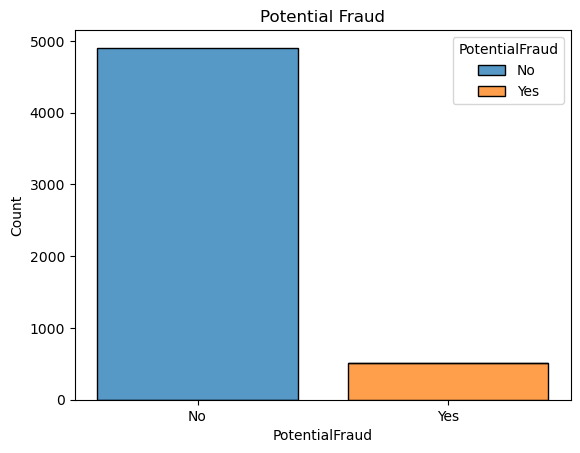

In [16]:
sns.histplot(data=train_df, x='PotentialFraud', hue='PotentialFraud', multiple='stack', shrink=.8)
plt.title('Potential Fraud')
plt.show()

In [17]:
dis = ['ChronicCond_Alzheimer', 'ChronicCond_Heartfailure',
       'ChronicCond_KidneyDisease', 'ChronicCond_Cancer',
       'ChronicCond_ObstrPulmonary', 'ChronicCond_Depression',
       'ChronicCond_Diabetes', 'ChronicCond_IschemicHeart',
       'ChronicCond_Osteoporasis', 'ChronicCond_rheumatoidarthritis',
       'ChronicCond_stroke']

In [18]:
dis = train_beneficiary_df[['ChronicCond_Alzheimer', 'ChronicCond_Heartfailure',
       'ChronicCond_KidneyDisease', 'ChronicCond_Cancer',
       'ChronicCond_ObstrPulmonary', 'ChronicCond_Depression',
       'ChronicCond_Diabetes', 'ChronicCond_IschemicHeart',
       'ChronicCond_Osteoporasis', 'ChronicCond_rheumatoidarthritis',
       'ChronicCond_stroke']]

sep_line = '=' * 60 

for col in dis:
    print(train_beneficiary_df[col].value_counts())
    print(sep_line)


ChronicCond_Alzheimer
2    92530
1    46026
Name: count, dtype: int64
ChronicCond_Heartfailure
2    70154
1    68402
Name: count, dtype: int64
ChronicCond_KidneyDisease
2    95277
1    43279
Name: count, dtype: int64
ChronicCond_Cancer
2    121935
1     16621
Name: count, dtype: int64
ChronicCond_ObstrPulmonary
2    105697
1     32859
Name: count, dtype: int64
ChronicCond_Depression
2    89296
1    49260
Name: count, dtype: int64
ChronicCond_Diabetes
1    83391
2    55165
Name: count, dtype: int64
ChronicCond_IschemicHeart
1    93644
2    44912
Name: count, dtype: int64
ChronicCond_Osteoporasis
2    100497
1     38059
Name: count, dtype: int64
ChronicCond_rheumatoidarthritis
2    102972
1     35584
Name: count, dtype: int64
ChronicCond_stroke
2    127602
1     10954
Name: count, dtype: int64


In [19]:
train_beneficiary_df[train_beneficiary_df.DOD.isnull() == False]

,BeneID,DOB,DOD,Gender,Race,RenalDiseaseIndicator,State,County,NoOfMonths_PartACov,NoOfMonths_PartBCov,...,ChronicCond_Depression,ChronicCond_Diabetes,ChronicCond_IschemicHeart,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt
6,BENE11007,1940-09-01,2009-12-01,1,2,0,45,610,12,12,...,2,1,2,1,1,2,0,0,1490,160
206,BENE11217,1939-07-01,2009-09-01,1,3,Y,5,160,12,12,...,1,1,1,1,1,2,0,0,3880,650
207,BENE11218,1928-12-01,2009-09-01,1,1,0,14,141,12,12,...,1,1,1,1,2,1,19000,1068,110,50
219,BENE11231,1937-12-01,2009-05-01,2,2,0,45,810,12,12,...,2,1,1,1,2,2,4000,1068,300,30
525,BENE11558,1927-12-01,2009-12-01,2,1,0,14,141,12,12,...,2,2,1,2,2,2,0,0,50,80
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
137494,BENE158067,1939-06-01,2009-08-01,2,1,0,10,400,12,12,...,2,1,1,1,2,2,7000,1068,1190,320
137497,BENE158070,1919-11-01,2009-06-01,2,1,0,33,420,12,12,...,1,1,1,2,2,2,0,0,40,0
137682,BENE158266,1929-07-01,2009-12-01,1,3,0,5,400,12,12,...,1,1,1,2,1,2,20200,1068,2220,250
137859,BENE158455,1932-08-01,2009-05-01,1,1,0,21,10,12,12,...,2,2,2,2,2,2,4000,1068,0,0


#### inpatient_df

In [20]:
inpatient_df.head(3)

,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,AdmissionDt,...,ClmDiagnosisCode_7,ClmDiagnosisCode_8,ClmDiagnosisCode_9,ClmDiagnosisCode_10,ClmProcedureCode_1,ClmProcedureCode_2,ClmProcedureCode_3,ClmProcedureCode_4,ClmProcedureCode_5,ClmProcedureCode_6
0,BENE11001,CLM46614,2009-04-12,2009-04-18,PRV55912,26000,PHY390922,NaN,NaN,2009-04-12,...,2724,19889,5849,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,BENE11001,CLM66048,2009-08-31,2009-09-02,PRV55907,5000,PHY318495,PHY318495,NaN,2009-08-31,...,NaN,NaN,NaN,NaN,7092.0,NaN,NaN,NaN,NaN,NaN
2,BENE11001,CLM68358,2009-09-17,2009-09-20,PRV56046,5000,PHY372395,NaN,PHY324689,2009-09-17,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [21]:
train_inpatient_df.head(3)


,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,AdmissionDt,...,ClmDiagnosisCode_7,ClmDiagnosisCode_8,ClmDiagnosisCode_9,ClmDiagnosisCode_10,ClmProcedureCode_1,ClmProcedureCode_2,ClmProcedureCode_3,ClmProcedureCode_4,ClmProcedureCode_5,ClmProcedureCode_6
0,BENE11001,CLM46614,2009-04-12,2009-04-18,PRV55912,26000,PHY390922,NaN,NaN,2009-04-12,...,2724,19889,5849,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,BENE11001,CLM66048,2009-08-31,2009-09-02,PRV55907,5000,PHY318495,PHY318495,NaN,2009-08-31,...,NaN,NaN,NaN,NaN,7092.0,NaN,NaN,NaN,NaN,NaN
2,BENE11001,CLM68358,2009-09-17,2009-09-20,PRV56046,5000,PHY372395,NaN,PHY324689,2009-09-17,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [22]:
w.summarize(train_inpatient_df)

Shape of Data: 
(40474, 30)
Info: 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40474 entries, 0 to 40473
Data columns (total 30 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   BeneID                  40474 non-null  object 
 1   ClaimID                 40474 non-null  object 
 2   ClaimStartDt            40474 non-null  object 
 3   ClaimEndDt              40474 non-null  object 
 4   Provider                40474 non-null  object 
 5   InscClaimAmtReimbursed  40474 non-null  int64  
 6   AttendingPhysician      40362 non-null  object 
 7   OperatingPhysician      23830 non-null  object 
 8   OtherPhysician          4690 non-null   object 
 9   AdmissionDt             40474 non-null  object 
 10  ClmAdmitDiagnosisCode   40474 non-null  object 
 11  DeductibleAmtPaid       39575 non-null  float64
 12  DischargeDt             40474 non-null  object 
 13  DiagnosisGroupCode      40474 non-null  object 
 14  Clm

In [23]:
train_outpatient_df.head(3)

,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,ClmDiagnosisCode_1,...,ClmDiagnosisCode_9,ClmDiagnosisCode_10,ClmProcedureCode_1,ClmProcedureCode_2,ClmProcedureCode_3,ClmProcedureCode_4,ClmProcedureCode_5,ClmProcedureCode_6,DeductibleAmtPaid,ClmAdmitDiagnosisCode
0,BENE11002,CLM624349,2009-10-11,2009-10-11,PRV56011,30,PHY326117,NaN,NaN,78943,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,56409
1,BENE11003,CLM189947,2009-02-12,2009-02-12,PRV57610,80,PHY362868,NaN,NaN,6115,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,79380
2,BENE11003,CLM438021,2009-06-27,2009-06-27,PRV57595,10,PHY328821,NaN,NaN,2723,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN


In [24]:
w.summarize(train_outpatient_df)

Shape of Data: 
(517737, 27)
Info: 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517737 entries, 0 to 517736
Data columns (total 27 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   BeneID                  517737 non-null  object 
 1   ClaimID                 517737 non-null  object 
 2   ClaimStartDt            517737 non-null  object 
 3   ClaimEndDt              517737 non-null  object 
 4   Provider                517737 non-null  object 
 5   InscClaimAmtReimbursed  517737 non-null  int64  
 6   AttendingPhysician      516341 non-null  object 
 7   OperatingPhysician      90617 non-null   object 
 8   OtherPhysician          195046 non-null  object 
 9   ClmDiagnosisCode_1      507284 non-null  object 
 10  ClmDiagnosisCode_2      322357 non-null  object 
 11  ClmDiagnosisCode_3      203257 non-null  object 
 12  ClmDiagnosisCode_4      125596 non-null  object 
 13  ClmDiagnosisCode_5      74344 non-null

In [25]:
train_inpatient_df_clean =w.wrangle_inpatient(train_inpatient_df)

In [26]:

w.summarize(train_inpatient_df_clean)

Shape of Data: 
(40474, 27)
Info: 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40474 entries, 0 to 40473
Data columns (total 27 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   beneid                  40474 non-null  object 
 1   claimid                 40474 non-null  object 
 2   claimstartdt            40474 non-null  object 
 3   claimenddt              40474 non-null  object 
 4   provider                40474 non-null  object 
 5   inscclaimamtreimbursed  40474 non-null  int64  
 6   attendingphysician      40474 non-null  object 
 7   operatingphysician      40474 non-null  object 
 8   otherphysician          40474 non-null  object 
 9   admissiondt             40474 non-null  object 
 10  clmadmitdiagnosiscode   40474 non-null  object 
 11  deductibleamtpaid       40474 non-null  float64
 12  dischargedt             40474 non-null  object 
 13  diagnosisgroupcode      40474 non-null  object 
 14  clm

In [27]:
train_outpatient_df.head(2)

,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,ClmDiagnosisCode_1,...,ClmDiagnosisCode_9,ClmDiagnosisCode_10,ClmProcedureCode_1,ClmProcedureCode_2,ClmProcedureCode_3,ClmProcedureCode_4,ClmProcedureCode_5,ClmProcedureCode_6,DeductibleAmtPaid,ClmAdmitDiagnosisCode
0,BENE11002,CLM624349,2009-10-11,2009-10-11,PRV56011,30,PHY326117,NaN,NaN,78943,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,56409
1,BENE11003,CLM189947,2009-02-12,2009-02-12,PRV57610,80,PHY362868,NaN,NaN,6115,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,79380


In [28]:
#wrangle_outpatient(df)

train_outpatient_df_clean =w.wrangle_outpatient(train_outpatient_df)

In [29]:

w.summarize(train_outpatient_df_clean)

Shape of Data: 
(517737, 20)
Info: 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517737 entries, 0 to 517736
Data columns (total 20 columns):
 #   Column                  Non-Null Count   Dtype 
---  ------                  --------------   ----- 
 0   beneid                  517737 non-null  object
 1   claimid                 517737 non-null  object
 2   claimstartdt            517737 non-null  object
 3   claimenddt              517737 non-null  object
 4   provider                517737 non-null  object
 5   inscclaimamtreimbursed  517737 non-null  int64 
 6   attendingphysician      517737 non-null  object
 7   operatingphysician      517737 non-null  object
 8   otherphysician          517737 non-null  object
 9   clmdiagnosiscode_1      517737 non-null  object
 10  clmdiagnosiscode_2      517737 non-null  object
 11  clmdiagnosiscode_3      517737 non-null  object
 12  clmdiagnosiscode_4      517737 non-null  object
 13  clmdiagnosiscode_5      517737 non-null  object
 14  

In [30]:
###################################

#  Call the function(summary of the row counts for different DataFrames)
# Call the function and pass the DataFrames as arguments
#rw.DataFrame_shape(train_inpatient_df, test_inpatient_df, new_df)
train_test_count, new_df_count = rw.DataFrame_shape(train_inpatient_df, test_inpatient_df, new_df)


print(f'Sum of train and test: {train_test_count}')
print(f'Sum of new DataFrame: {new_df_count}')

In [31]:
train_beneficiary_df.shape

(138556, 25)

In [32]:
w.summarize(train_beneficiary_df)

Shape of Data: 
(138556, 25)
Info: 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 138556 entries, 0 to 138555
Data columns (total 25 columns):
 #   Column                           Non-Null Count   Dtype 
---  ------                           --------------   ----- 
 0   BeneID                           138556 non-null  object
 1   DOB                              138556 non-null  object
 2   DOD                              1421 non-null    object
 3   Gender                           138556 non-null  int64 
 4   Race                             138556 non-null  int64 
 5   RenalDiseaseIndicator            138556 non-null  object
 6   State                            138556 non-null  int64 
 7   County                           138556 non-null  int64 
 8   NoOfMonths_PartACov              138556 non-null  int64 
 9   NoOfMonths_PartBCov              138556 non-null  int64 
 10  ChronicCond_Alzheimer            138556 non-null  int64 
 11  ChronicCond_Heartfailure         138556 no

In [33]:
rw.summarize(train_inpatient_df)

NameError: name 'rw' is not defined

In [ ]:
train_inpatient_df.head().T

,0,1,2,3,4
BeneID,BENE11001,BENE11002,BENE11003,BENE11004,BENE11005
DOB,1943-01-01,1936-09-01,1936-08-01,1922-07-01,1935-09-01
DOD,NaN,NaN,NaN,NaN,NaN
Gender,1,2,1,1,1
Race,1,1,1,1,1
RenalDiseaseIndicator,0,0,0,0,0
State,39,39,52,39,24
County,230,280,590,270,680
NoOfMonths_PartACov,12,12,12,12,12
NoOfMonths_PartBCov,12,12,12,12,12


In [ ]:
train_outpatient_df.head().T

,0,1,2,3,4
BeneID,BENE11002,BENE11003,BENE11003,BENE11004,BENE11004
ClaimID,CLM624349,CLM189947,CLM438021,CLM121801,CLM150998
ClaimStartDt,2009-10-11,2009-02-12,2009-06-27,2009-01-06,2009-01-22
ClaimEndDt,2009-10-11,2009-02-12,2009-06-27,2009-01-06,2009-01-22
Provider,PRV56011,PRV57610,PRV57595,PRV56011,PRV56011
InscClaimAmtReimbursed,30,80,10,40,200
AttendingPhysician,PHY326117,PHY362868,PHY328821,PHY334319,PHY403831
OperatingPhysician,NaN,NaN,NaN,NaN,NaN
OtherPhysician,NaN,NaN,NaN,NaN,NaN
ClmDiagnosisCode_1,78943,6115,2723,71988,82382


In [ ]:
# Example usage
train_outpatient_df = pd.read_csv("train_outpatient.csv")
train_outpatient_df.name = "Train Outpatient"
train_beneficiary_df = pd.read_csv("train_beneficiary.csv")
train_beneficiary_df.name = "Train Beneficiary"
train_inpatient_df = pd.read_csv("train_inpatient.csv")
train_inpatient_df.name = "Train Inpatient"
train_df = pd.read_csv("train.csv")
train_df.name = "Train"
dataframes = [train_outpatient_df, train_beneficiary_df, train_inpatient_df, train_df]

display_shapes(dataframes)


In [ ]:
def display_shape(dataframe, name="DataFrame"):
    if isinstance(dataframe, pd.DataFrame):
        print(f"Shape of {name}: {dataframe.shape}")
    else:
        print("Not a valid DataFrame.")
